In [1]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/MyDrive/2022_AI_Competition/2022-AI-competition-Round1")
os.listdir()

['.git',
 "2022-08-05 LGB_train(hyeonbin's parameter tuning).ipynb",
 '2022-08-06 Optimize ET.ipynb',
 '2022-08-06 Regressor model compare.ipynb',
 'AutoML Baseline.ipynb',
 'Evaluator Module.ipynb',
 'Optuna Optimization.ipynb',
 'README.md',
 'catboost_info',
 'competition_data',
 'evaluator',
 'html',
 'model compare.ipynb',
 'submission',
 '.ipynb_checkpoints',
 '.gitignore',
 'GitHub Connection.ipynb',
 'playground.ipynb',
 '2022-08-04 feature EDA.ipynb',
 'sweetviz_Advertising.html',
 'sweetviz_Compare_Target.html',
 'feature_EDA_correlation.ipynb']

In [115]:
train_df = pd.read_csv('competition_data/train.csv')
train_df = train_df.drop(["index", "country"], axis=1)
train_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [116]:
test_df = pd.read_csv("competition_data/test.csv")
test_df = test_df.drop(["index", "country"], axis=1)
test_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,2.0,2.0,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,1.0,1.0,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,2.0,2.0,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,1.0,1.0,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,2.0,2.0,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0


In [117]:
train_df.loc[:,"nerdiness"].value_counts()


1    8303
0    6697
Name: nerdiness, dtype: int64

## SweetViz EDA

In [118]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
import sweetviz as sv

advert_report = sv.analyze(train_df)
advert_report.show_html('./sweetviz_Advertising.html')

                                             |          | [  0%]   00:00 -> (? left)

Report ./sweetviz_Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
import IPython
IPython.display.HTML(filename="sweetviz_Advertising.html")

Output hidden; open in https://colab.research.google.com to view.

In [9]:
df1 = sv.compare([train_df,"Train"], [test_df,"Test"])
df1.show_html('./sweetviz_Compare_Target.html')

                                             |          | [  0%]   00:00 -> (? left)

Report ./sweetviz_Compare_Target.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
import IPython
IPython.display.HTML(filename="sweetviz_Compare_Target.html")

Output hidden; open in https://colab.research.google.com to view.

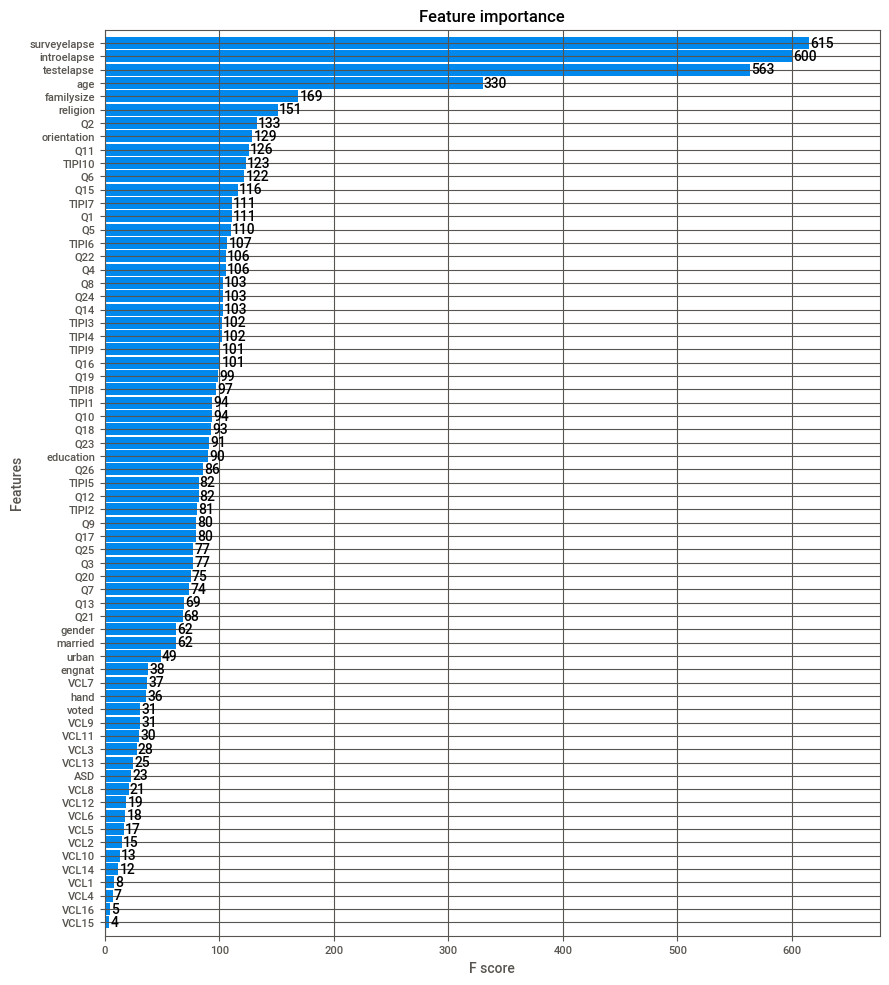

In [120]:
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance as xpi
import matplotlib.pyplot as plt

X_train, y_train = train_df.drop(["nerdiness"], axis=1), train_df.nerdiness
xgb_clf = XGBClassifier(
    n_estimators=1000,
)
xgb_clf.fit(X_train, y_train)

plt.rcParams["figure.figsize"] = (10, 12)
xpi(xgb_clf, max_num_features=70, height=.9)

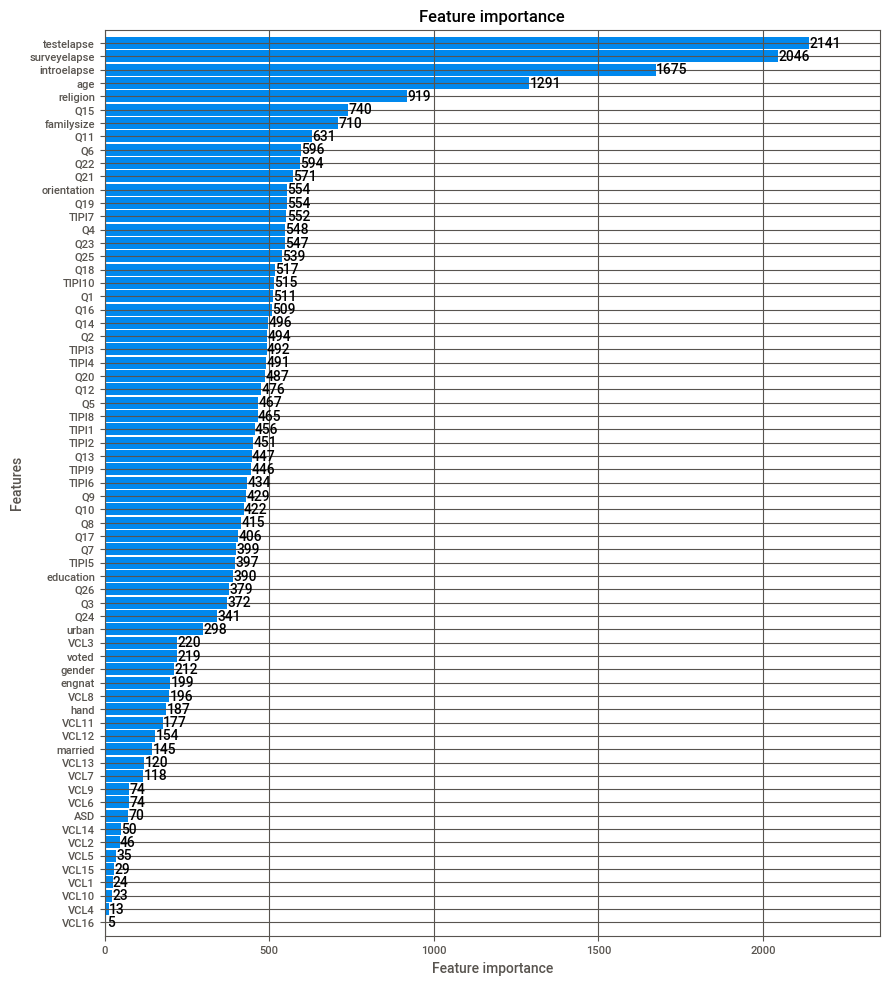

In [121]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance as lpi

lgbm_clf = LGBMClassifier(
    n_estimators=1000,
)
lgbm_clf.fit(X_train, y_train)
lpi(lgbm_clf, max_num_features = 70, height=.9, figsize=(10,12))

# Correlation

In [122]:
corr = train_df.corr(method='pearson')
corr_round = corr.round(decimals=2)
corr_round

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
Q1,1.00,0.18,0.38,0.58,0.22,0.17,0.11,0.33,0.17,0.23,...,0.00,0.00,0.03,-0.00,0.15,0.08,-0.14,0.01,-0.12,0.29
Q2,0.18,1.00,0.14,0.19,0.17,0.15,0.34,0.24,0.20,0.15,...,0.00,-0.01,0.04,-0.03,0.07,-0.02,-0.03,0.01,-0.04,0.26
Q3,0.38,0.14,1.00,0.33,0.15,0.19,0.08,0.35,0.09,0.30,...,-0.01,-0.03,0.01,-0.04,0.15,0.06,-0.13,0.01,-0.09,0.21
Q4,0.58,0.19,0.33,1.00,0.27,0.21,0.13,0.27,0.21,0.24,...,-0.07,0.00,0.05,-0.02,0.18,0.03,-0.08,0.01,-0.17,0.27
Q5,0.22,0.17,0.15,0.27,1.00,0.31,0.31,0.12,0.43,0.28,...,0.03,0.00,0.05,-0.04,0.03,-0.05,0.06,0.01,-0.08,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
voted,0.08,-0.02,0.06,0.03,-0.05,-0.05,-0.04,0.08,-0.03,-0.04,...,0.06,-0.01,0.01,0.01,0.06,1.00,-0.20,-0.01,-0.01,-0.01
married,-0.14,-0.03,-0.13,-0.08,0.06,0.05,0.07,-0.12,0.05,0.01,...,-0.12,0.02,0.00,0.05,-0.15,-0.20,1.00,0.00,0.04,-0.03
familysize,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.00,0.03,0.02,0.02,-0.01,0.00,1.00,-0.03,-0.01
ASD,-0.12,-0.04,-0.09,-0.17,-0.08,-0.04,-0.02,-0.05,-0.04,-0.05,...,0.04,0.00,-0.04,-0.01,-0.09,-0.01,0.04,-0.03,1.00,-0.06


In [123]:
# Replace diagonal with 0
corr_replace1 = corr_round.replace(1, 0)
# get the index to be dropped = column that has no meaningful correlation (values between -0.3~0.3)
THRESHOLD = 0.6
df = corr_replace1
df['small_max'] = corr_replace1.max()<THRESHOLD
df['large_min'] = corr_replace1.min()>-THRESHOLD
df['remove'] = df['small_max'] & df['large_min']
index = df[df['remove']].index
index

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q12',
       'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'introelapse', 'testelapse', 'surveyelapse',
       'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8',
       'TIPI9', 'TIPI10', 'VCL2', 'VCL3', 'VCL5', 'VCL6', 'VCL7', 'VCL8',
       'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL16',
       'education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion',
       'orientation', 'voted', 'married', 'familysize', 'ASD', 'nerdiness'],
      dtype='object')

In [124]:
# Drop - for visualzation 
corr_drop = corr_replace1.drop(index)
corr_drop = corr_drop.drop(columns=index)
corr_drop = corr_drop.drop(columns=['small_max', 'large_min', 'remove'])
corr_drop

,Q11,Q19,VCL1,VCL4,VCL15
Q11,0.00,0.60,0.01,0.02,0.01
Q19,0.60,0.00,0.02,0.03,0.01
VCL1,0.01,0.02,0.00,0.63,0.59
VCL4,0.02,0.03,0.63,0.00,0.60
VCL15,0.01,0.01,0.59,0.60,0.00


In [125]:
high_correlation_pair = []
idx_list = corr_drop.index
for i in range(len(corr_drop)):
    for j in range(i, len(corr_drop)):
        row = idx_list[i]
        column = idx_list[j]
        if corr_drop.loc[row][column] >= THRESHOLD:
            high_correlation_pair.append((row, column))
high_correlation_pair

[('Q11', 'Q19'), ('VCL1', 'VCL4'), ('VCL4', 'VCL15')]

### Result of Visualization 
- The following pairs have fairly high positive correlation
    - Q11 and Q19 (0.6)
    - VCL1 and VCL4 (0.63)
    - VCL14 and VCL15 (0.6)


# Removal of Abnormalies

> Abnormal, in sense of correlation



In [175]:
# Get the drop index
drop_index1 = train_df[train_df['Q11']*train_df['Q19'] == 5 ].index
drop_index2 = train_df[train_df['VCL1']!=train_df["VCL4"]].index
drop_index3 = train_df[train_df['VCL14']!=train_df["VCL15"]].index

print("drop_index1, drop_index2, drop_index3: ",len(drop_index1), len(drop_index2), len(drop_index3) )

def get_drop_index(mode):
    drop_index_inter1 = drop_index1.intersection(drop_index2)
    drop_index_inter2 = drop_index2.intersection(drop_index3)
    drop_index_inter3 = drop_index3.intersection(drop_index1)
    
    if mode == 1:
        drop_index = drop_index_inter1.union(drop_index_inter2)
        drop_index = drop_index.union(drop_index_inter3)
        return drop_index

    if mode == 2:
        drop_index = drop_index1.union(drop_index2)
        drop_index = drop_index.union(drop_index3)
        return drop_index

drop_index1, drop_index2, drop_index3:  423 293 1161


In [165]:
drop_mode1 = get_drop_index(1)
drop_mode2 = get_drop_index(2)
drop_mode1, drop_mode2

(Int64Index([   99,   150,   312,   393,   785,  1093,  1144,  1213,  1663,
              1705,
             ...
             13980, 14012, 14028, 14112, 14165, 14178, 14214, 14290, 14757,
             14844],
            dtype='int64', length=138),
 Int64Index([    4,    10,    15,    21,    25,    41,    56,    61,    65,
                68,
             ...
             14920, 14926, 14931, 14939, 14958, 14966, 14975, 14988, 14990,
             14993],
            dtype='int64', length=2015))

In [176]:
train_df = pd.read_csv('competition_data/train.csv')
train_df = train_df.drop(["index", "country"], axis=1)

train_df = train_df.drop(drop_mode2)
train_df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,...,1.0,26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


## Evaluator

In [154]:
pip install catboost optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [155]:
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    mean_absolute_error,
)
import pandas as pd
import numpy as np
# from tqdm.notebook import tqdm

from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import (
    RandomForestClassifier, 
    RandomForestRegressor,
    ExtraTreesClassifier,
    ExtraTreesRegressor,
)
from sklearn.impute import SimpleImputer
import optuna

class Model():
  def __init__(self, train_df, model_name="lgbm", model_type="clf", **params):
    self.model_name = model_name
    self.model_type = model_type
    self.train_df = train_df
    self.model = None
    if model_name == "lgbm":
      if model_type == "clf":
        self.model = LGBMClassifier(**params)
      elif model_type == "rgr":
        self.model = LGBMRegressor(**params)
    elif model_name == "xgb":
      if model_type == "clf":
        self.model = XGBClassifier(**params)
      elif model_type == "rgr":
        self.model = XGBRegressor(**params)
    elif model_name == "et":
      if model_type == "clf":
        self.model = ExtraTreesClassifier(**params)
      elif model_type == "rgr":
        self.model = ExtraTreesRegressor(**params)
    elif model_name == "rf":
      if model_type == "clf":
        self.model = RandomForestClassifier(**params)
      elif model_type == "rgr":
        self.model = RandomForestRegressor(**params)
    elif model_name == "cat":
      if model_type == "clf":
        self.model = CatBoostClassifier(**params)
      elif model_type == "rgr":
        self.model = CatBoostRegressor(**params)
    else:
      raise NameError("model_name must be in ('lgbm', 'xgb', 'rf', 'et', 'cat')")
    
    if self.model is None:
      raise NameError("model_type must be in ('clf', 'rgr')")

  def get_model(self):
    return {
        "train_df": self.train_df,
        "model": self.model,
        "model_name": self.model_name,
        "model_type": self.model_type,
    }

  def optimize(self, initial_params, **kwargs):
    self.optimizer = Optimizer(
        self.train_df, 
        initial_params, 
        self.model_name,
        self.model_type,
    )
    best_params = self.optimizer.run(**kwargs)
    self.__init__(self.train_df, self.model_name, self.model_type, **best_params)

class Optimizer():
  def __init__(self, train_df, initial_params, model_name, model_type, random_seed=42):
    self.params = {}
    self.train_df = train_df
    self.initial_params = initial_params
    self.model_name = model_name
    self.model_type = model_type
    self.random_seed = random_seed

  def objective(self, trial):
    ## Tuning Parmeters
    for param, dtype, value in self.initial_params:
      if dtype == "static":
        self.params[param] = value
      elif dtype == "int":
        self.params[param] = trial.suggest_int(param, *value)
      elif dtype == "float":
        self.params[param] = trial.suggest_uniform(param, *value)
      elif dtype == "log":
        self.params[param] = trial.suggest_loguniform(param, *value)
      elif dtype == "categorical":
        self.params[param] = trial.suggest_categorical(param, value)
      else:
        raise NameError("dtype must be one of ('static', 'int', 'float', 'log', 'categorical')")

    ## Objective Metric
    result_df = Evaluator(
        **Model(self.train_df, self.model_name, self.model_type, **self.params).get_model()
    ).run(train_acc=False)

    return result_df["roc_auc"]["mean"]

  def optimize(self, n_trials=100, n_runs=1, sampling="TPE"):
    if sampling == "random":
      sampler = optuna.samplers.RandomSampler(seed=self.random_seed)
    elif sampling == "TPE":
      sampler = optuna.samplers.TPESampler()

    self.n_runs = n_runs
    self.opt = optuna.create_study(
        direction='maximize',
        sampler=sampler,
    )
    self.opt.optimize(self.objective, n_trials=n_trials)

  def analyze(self):
    optuna.visualization.plot_optimization_history(self.opt).show()
    optuna.visualization.plot_param_importances(self.opt).show()
    optuna.visualization.plot_slice(self.opt).show()

  def best_params(self):
    print(self.opt.best_trial.value)
    print(self.opt.best_trial.params)
    return self.opt.best_trial.params

  def run(self, **kwargs):
    self.optimize(**kwargs)
    self.analyze()
    return self.best_params()

class Evaluator():
  def __init__(self, model, train_df, n_folds=4, random_state=42, model_name=None, model_type="clf"):
    self.kf = KFold(n_splits=n_folds, random_state=random_state, shuffle=True)
    self.model = model
    self.model_name = model_name
    self.model_type = model_type
    self.train_df = train_df
    if self.model_name == 'cat':
      self.fit_params = {'silent': True}
    else:
      self.fit_params = {}

  def drop_col(self, df, col_list=["index", "country"]):
    return df.drop(col_list, axis=1)

  def index_col(self, df, col_list=["country"]):
    def _indexer(col):
      col_list = list(set(df[col]))
      col_map = {
          c: i 
          for i, c in enumerate(col_list)
      }
      return df[col].apply(lambda x: col_map[x])

    for col in col_list:
      df[f"{col}_idx"] = _indexer(col)
    return self.drop_col(df, col_list)

  def preprocess(self, df=None, mode="index"):
    assert mode in ("index", "drop")

    df = self.train_df if df is None else df

    if mode == "drop":
      return self.drop_col(df)
    elif mode == "index":
      df = self.index_col(df)
      return self.drop_col(df, col_list=["index"])

  def evaluate(self, metrics="all", train_acc=True):
    train_x=self.train_df.drop(['nerdiness'], axis=1)
    train_y=self.train_df['nerdiness']

    if metrics == "all":
      metrics = [
          "accuracy", "precision", "recall", 
          "f1-score", "roc_auc", "mae"
      ]
    metrics_functions_map = {
        "accuracy": accuracy_score,
        "precision": precision_score,
        "recall": recall_score,
        "f1-score": f1_score,
        "roc_auc": roc_auc_score,
        "mae": mean_absolute_error,
    }
    class_metrics = {
        "accuracy",
        "precision",
        "recall",
        "f1-score",
    }
    result_df = pd.DataFrame(
        columns = metrics + ["train_acc"]
    )

    for i, (train_index, val_index) in enumerate(self.kf.split(train_x)):
      X_train, X_test = train_x.loc[train_index], train_x.loc[val_index]
      y_train, y_test = train_y.loc[train_index], train_y.loc[val_index]

      self.model.fit(X_train, y_train, **self.fit_params)
      if self.model_type == 'rgr':
        predictions = self.model.predict(X_test)
      else:
        predictions = self.model.predict_proba(X_test)[:,1]

      row = {}
      for metric in metrics:
        if metric in class_metrics:
          score = metrics_functions_map[metric](
              y_test,
              np.array(predictions) > 0.5,
          )
        else:
          score = metrics_functions_map[metric](y_test, predictions)
        row[metric] = score
      result_df = result_df.append(
          row, ignore_index=True
      )

    result_df["fold"] = list(range(1, i+2))
    result_df = result_df.set_index("fold")

    ## add training accuracy
    mean = result_df.mean(axis=0)
    self.model.fit(train_x, train_y, **self.fit_params)
    if self.model_type == 'rgr':
      predictions = self.model.predict(train_x)
    else:
      predictions = self.model.predict_proba(train_x)[:,1]
    mean["train_acc"] = accuracy_score(
      np.array(predictions) > 0.5, 
      train_y,
    )
    result_df.loc["mean"] = mean

    return result_df

  def run(self, **kwargs):
    #self.train_df = self.preprocess(self.train_df)
    self.train_df = self.train_df.dropna()
    self.train_df = self.train_df.reset_index()
    self.train_df = self.train_df.drop(["index"], axis=1)
    return self.evaluate(**kwargs)

  def train_best_model(self, n_runs=10, metric='roc_auc', threshold=None, **kwargs):
    best_model = None
    best_result = None

    #self.train_df = self.preprocess(self.train_df)
    self.train_df = self.train_df.dropna()
    self.train_df = self.train_df.reset_index()
    self.train_df = self.train_df.drop(["index"], axis=1)

    for _ in range(n_runs):
      result_df = self.evaluate(**kwargs)
      result_metric = result_df[metric]['mean']

      if best_result is None or \
        best_result[metric]['mean'] < result_metric:
          best_model = self.model
          best_result = result_df

      if threshold is not None and result_metric > threshold:
        break

    self.model = best_model
    return best_result

  def make_submission(self, test_df, submission_df):
    test_df = self.preprocess(test_df)

    # handle nan values
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imp = imp.fit(test_df)
    test_df = pd.DataFrame(
      imp.transform(test_df),
      columns=test_df.columns
    )
    
    if self.model_type == 'rgr':
      preds = self.model.predict(test_df)
    else:
      preds = self.model.predict_proba(test_df)[:,1]
    submission_df["nerdiness"] = preds
    return submission_df


In [177]:
evaluator = Evaluator(
    **Model(train_df, "lgbm", "rgr").get_model()
)
evaluator.run()


,accuracy,precision,recall,f1-score,roc_auc,mae,train_acc
fold,,,,,,,
1,0.762639,0.767630,0.836272,0.800482,0.833029,0.338584,NaN
2,0.740050,0.751563,0.821118,0.784803,0.810920,0.349584,NaN
3,0.752241,0.763936,0.829524,0.795381,0.820424,0.342679,NaN
4,0.751165,0.760555,0.824451,0.791215,0.822932,0.346228,NaN
mean,0.751524,0.760921,0.827841,0.792970,0.821826,0.344269,0.860613
